In [1]:
# In order to load the data, this file must be place insde the "MNIST fashion dataset" folder 
# (the same folder where training and testing folder are)
import os, skimage.io,matplotlib.pyplot as plt, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) for f in os.listdir(label_directory)]
        for f in file_names:
            images.append(skimage.io.imread(f))
            labels.append(int(d))
    return images, labels

In [3]:
train_data_path = os.path.join(os.getcwd(),"training")
test_data_path = os.path.join(os.getcwd(),"testing")
original_images, original_labels = load_data(train_data_path)
original_test_images,original_test_labels = load_data(test_data_path)

In [35]:
images = np.asarray(original_images)
test_images = np.asarray(original_test_images)
labels = np.asarray(original_labels)
test_labels = np.asarray(original_test_labels)

In [36]:
train_images,validation_images,train_labels,validation_labels = train_test_split(images, labels, train_size=0.9, test_size=0.1,random_state=0)

In [37]:
print(train_images.shape,train_labels.shape,validation_images.shape,validation_labels.shape,test_images.shape,test_labels.shape)

(54000, 28, 28) (54000,) (6000, 28, 28) (6000,) (10000, 28, 28) (10000,)


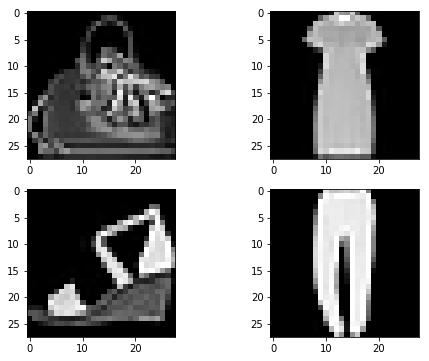

In [38]:
# plot 4 images as grayscale
plt.subplot(221)
plt.imshow(train_images[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(train_images[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(train_images[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(train_images[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [39]:
num_pixels = train_images.shape[1] * train_images.shape[2]
train_images = train_images.reshape(train_images.shape[0],
num_pixels).astype('float32')
validation_images = validation_images.reshape(validation_images.shape[0],
num_pixels).astype('float32')
test_images = test_images.reshape(test_images.shape[0], num_pixels).astype('float32')

In [40]:
train_images = train_images/255
validation_images = validation_images/255
test_images = test_images/255

In [41]:
train_labels = np_utils.to_categorical(train_labels)
validation_labels = np_utils.to_categorical(validation_labels)
test_labels = np_utils.to_categorical(test_labels)
num_classes = train_labels.shape[1]

In [42]:
model = Sequential()
model.add(Dense(460, input_dim=num_pixels, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 14s 253us/step - loss: 0.4846 - acc: 0.8278 - val_loss: 0.4083 - val_acc: 0.8523
Epoch 2/10
54000/54000 [==============================] - 13s 239us/step - loss: 0.3642 - acc: 0.8663 - val_loss: 0.4144 - val_acc: 0.8468
Epoch 3/10
54000/54000 [==============================] - 13s 242us/step - loss: 0.3263 - acc: 0.8809 - val_loss: 0.3462 - val_acc: 0.8670
Epoch 4/10
54000/54000 [==============================] - 13s 242us/step - loss: 0.3020 - acc: 0.8884 - val_loss: 0.3332 - val_acc: 0.8728
Epoch 5/10
54000/54000 [==============================] - 13s 248us/step - loss: 0.2843 - acc: 0.8941 - val_loss: 0.3150 - val_acc: 0.8853
Epoch 6/10
54000/54000 [==============================] - 13s 250us/step - loss: 0.2677 - acc: 0.9004 - val_loss: 0.3276 - val_acc: 0.8833
Epoch 7/10
54000/54000 [==============================] - 13s 248us/s

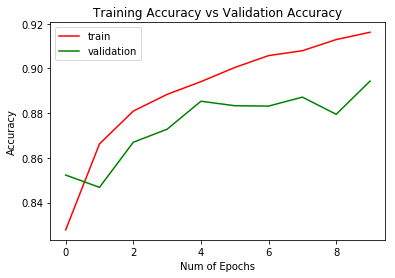

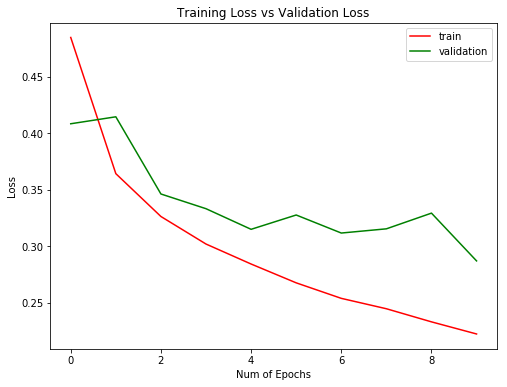

Training Accuracy: 91.62%
Validation Accuracy: 89.43%


In [12]:
history = model.fit(train_images, train_labels,
validation_data=(validation_images,validation_labels), epochs=10)
training_accuracy = history.history['acc']
validation_accuracy = history.history['val_acc']
training_error = history.history['loss']
validation_error = history.history['val_loss']
plt.figure(0)
plt.plot(training_accuracy,'r')
plt.plot(validation_accuracy,'g')
plt.xticks(np.arange(0, len(training_accuracy), 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
plt.figure(1)
plt.plot(training_error,'r')
plt.plot(validation_error,'g')
plt.xticks(np.arange(0, len(training_accuracy), 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()
print("Training Accuracy: %.2f%%" % (training_accuracy[9]*100) )
print("Validation Accuracy: %.2f%%" % (validation_accuracy[9]*100) )

In [13]:
scores = model.evaluate(test_images, test_labels, verbose=0)
print("MLP Error on test set: %.2f%%" % (100-scores[1]*100))
print("MLP Accuracy on test set: %.2f%%" % (scores[1]*100))

MLP Error on test set: 11.14%
MLP Accuracy on test set: 88.86%


In [14]:
print(history.history['acc'])

[0.8277962962962963, 0.8662592592592593, 0.8809259259259259, 0.8884074074074074, 0.8940925925925925, 0.900425925925926, 0.9057407407407407, 0.9079259259259259, 0.9129074074074074, 0.9161851851851852]


In [43]:
images = images.reshape(images.shape[0], num_pixels).astype('float32')
images = images/255
temp_labels = labels
labels = np_utils.to_categorical(labels)
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cv_acc = []
cv_error = []
for train, test in kfold.split(images, temp_labels):
    # create model
    model = Sequential()
    model.add(Dense(460, input_dim=num_pixels, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam',
    metrics=['accuracy'])
# Fit the model
model.fit(images[train], labels[train], epochs=10, verbose=0)
# evaluate the model
scores = model.evaluate(images[test], labels[test], verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
cv_acc.append(scores[1] * 100)
cv_error.append(100-scores[1] * 100)
print("Cross Validation Accuracy %.2f%% (+/- %.2f%%)" % (np.mean(cv_acc),
np.std(cv_acc)))
print("Cross Validation Error %.2f%% (+/- %.2f%%)" % (np.mean(cv_error),
np.std(cv_error)))
scores = model.evaluate(test_images, test_labels, verbose=0)
print("MLP Error on test set: %.2f%%" % (100-scores[1]*100))
print("MLP Accuracy on test set: %.2f%%" % (scores[1]*100))

acc: 88.82%
Cross Validation Accuracy 88.82% (+/- 0.00%)
Cross Validation Error 11.18% (+/- 0.00%)
MLP Error on test set: 12.69%
MLP Accuracy on test set: 87.31%


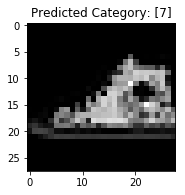

In [16]:
import random
image_index = random.randint(0,test_images.shape[0])
random_image = test_images[image_index]
random_label = model.predict(random_image.reshape(1,random_image.shape[0])).argmax(axis=-1)
plt.subplot(221)
plt.imshow(random_image.reshape(28,28), cmap=plt.get_cmap('gray'))
plt.title("Predicted Category: "+str(random_label))
plt.show()